In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [4]:
cancer = load_breast_cancer(as_frame = True)

cancer_data = cancer['data']
cancer_target = cancer['target']
cancer_feature_name = cancer['feature_names']
cancer_names_target = cancer['target_names']

cancer_data_train,cancer_data_test,cancer_target_train,cancer_target_test  = \
    train_test_split(cancer_data, cancer_target,test_size=0.2,random_state=123)

cancer_data_train = pd.DataFrame(data = cancer_data_train, columns = cancer_feature_name)
cancer_data_test = pd.DataFrame(data = cancer_data_test, columns = cancer_feature_name)

In [6]:
cancer_data_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
190,14.22,23.12,94.37,609.9,0.10750,0.24130,0.19810,0.066180,0.2384,0.07542,...,15.74,37.18,106.40,762.4,0.15330,0.93270,0.84880,0.17720,0.5166,0.14460
134,18.45,21.91,120.20,1075.0,0.09430,0.09709,0.11530,0.068470,0.1692,0.05727,...,22.52,31.39,145.60,1590.0,0.14650,0.22750,0.39650,0.13790,0.3109,0.07610
386,12.21,14.09,78.78,462.0,0.08108,0.07823,0.06839,0.025340,0.1646,0.06154,...,13.13,19.29,87.65,529.9,0.10260,0.24310,0.30760,0.09140,0.2677,0.08824
118,15.78,22.91,105.70,782.6,0.11550,0.17520,0.21330,0.094790,0.2096,0.07331,...,20.19,30.50,130.30,1272.0,0.18550,0.49250,0.73560,0.20340,0.3274,0.12520
316,12.18,14.08,77.25,461.4,0.07734,0.03212,0.01123,0.005051,0.1673,0.05649,...,12.85,16.47,81.60,513.1,0.10010,0.05332,0.04116,0.01852,0.2293,0.06037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,11.60,12.84,74.34,412.6,0.08983,0.07525,0.04196,0.033500,0.1620,0.06582,...,13.06,17.16,82.96,512.5,0.14310,0.18510,0.19220,0.08449,0.2772,0.08756
322,12.86,13.32,82.82,504.8,0.11340,0.08834,0.03800,0.034000,0.1543,0.06476,...,14.04,21.08,92.80,599.5,0.15470,0.22310,0.17910,0.11550,0.2382,0.08553
382,12.05,22.72,78.75,447.8,0.06935,0.10730,0.07943,0.029780,0.1203,0.06659,...,12.57,28.71,87.36,488.4,0.08799,0.32140,0.29120,0.10920,0.2191,0.09349
365,20.44,21.78,133.80,1293.0,0.09150,0.11310,0.09799,0.077850,0.1618,0.05557,...,24.31,26.37,161.20,1780.0,0.13270,0.23760,0.27020,0.17650,0.2609,0.06735


In [7]:
cancer_target_train

190    0
134    0
386    1
118    0
316    1
      ..
98     1
322    1
382    1
365    0
510    1
Name: target, Length: 455, dtype: int64

In [268]:
train_X = np.array(cancer_data_train)
test_X = np.array(cancer_data_test)
train_y = np.array(cancer_target_train).reshape((cancer_target_train.shape[0], 1))
test_y = np.array(cancer_target_test).reshape((cancer_target_test.shape[0], 1))

In [269]:
train_X = np.column_stack((np.ones((train_X.shape[0], 1)), train_X))
test_X = np.column_stack((np.ones((test_X.shape[0], 1)), test_X))

# Implementing Vote and Average Perceptron

In [403]:
class Vote_Ave_Perceptron:
    """
    :param X(ndarray): input training data
    :param y(ndarray): input training label
    :param init(int 0, 1, 2): type of initialize, there are three method in class

    :parameter self.m: row of input training data
    :parameter self.n: column of input training data
    :parameter self.vote: used in vote perceptron, store the score of each theta
    :parameter self.vote_con: used in vote perceptron, container of vote
    :parameter self.container: container that store the theta
    :parameter self.cost: store the cost of perceptron during each training sample
    :parameter self.theta: weight of perceptron
    """

    def __init__(self, X, y, init):
        self.m = X.shape[0]
        self.n = X.shape[1]
        #initialize vote
        self.vote = 0
        #initialize vote container
        self.vote_con = np.array([])
        #initialize predict result
        #self.prediction = np.array([])
        #inialize theta container
        self.container = np.zeros((self.n, 1))
        #initalize cost
        self.cost = np.array([])

        #initialize weight
        if init == 0:
            self.theta = np.zeros((self.n, 1))
        if init == 1:
            self.theta = np.ones((self.n, 1))
        if init == 2:
            self.theta = np.random.random((self.n, 1))

        self.X = np.array(X)
        self.y = np.array(y)

    def step_function(self, x, str):
        if str == "int":
            return 1 if x >= 0 else 0

        if str == "ndarray":
            for i in range(x.shape[0]):
                if x[i] >= 0:
                    x[i] = 1
                else:
                    x[i] =0
            return x


    def train(self):
        for i in range(0, self.m):
            sample = self.X[i].reshape((1, self.n))
            judge = (self.y[i] - 0.5) * (sample @ self.theta)
            temp = -(self.y[i] - 0.5) * sample @ self.theta
            self.cost = np.append(self.cost, (np.sum((temp if temp > 0 else 0))))

            if judge <= 0:
                self.container = np.hstack((self.container, self.theta))
                self.theta = self.theta + ((self.y[i] - 0.5) * sample).T
                self.vote_con = np.append(self.vote_con, self.vote)
                self.vote = 1
            else:
                self.vote += 1

        self.container = np.delete(self.container, 0, axis = 1)


    def output(self, test, type):
        if type == "vote":
            prediction = np.array([])
            for item in test:
                first_step = self.step_function(item @ self.container, "ndarray")
                predict= self.step_function(np.sum(self.vote_con * (first_step - 0.5)), "int")
                prediction = np.append(prediction, predict)

            return prediction

        if type == "average":
            #print(self.vote_con.shape, self.container.shape)
            pram = np.sum(self.vote_con * self.container, axis = 1)
            pram = pram.reshape((self.n, 1))
            #print(pram.shape)
            res = self.step_function(test @ pram, "ndarray")

            return res


# Compare Vote and Average Perceptron

Before compare the performance of Vote and Average Perceptron, I found that the breast cancer data have some large scale features which may disturb my training process. So I complete a Normalized operation toward my training and testing data


In [279]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

std = StandardScaler()
train_X_std = std.fit_transform(train_X)
test_X_std = std.fit_transform(test_X)

model_vote = Vote_Ave_Perceptron(train_X_std, train_y, 0)
model_vote.train()
pred = model_vote.output(test_X_std,"vote")

print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.97      0.99      0.98        73

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [282]:
model_avr = Vote_Ave_Perceptron(train_X_std, train_y, 0)
model_avr.train()
pred = model_avr.output(test_X_std,"average")

print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        41
           1       0.97      1.00      0.99        73

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



From above result, average perceptron slightly outperform to vote perceptron from prediction ability perspective. Besides, result show that both algorithms have a very positive performance on normalized testing data.

# Compare two algorithm through visualization
## Cost
Calculated by:
$J_p(\theta) = \frac{1}{m}\sum_{i = 1}^m max(0, -(y^{(i)} - 0.5)\theta^Tx)$

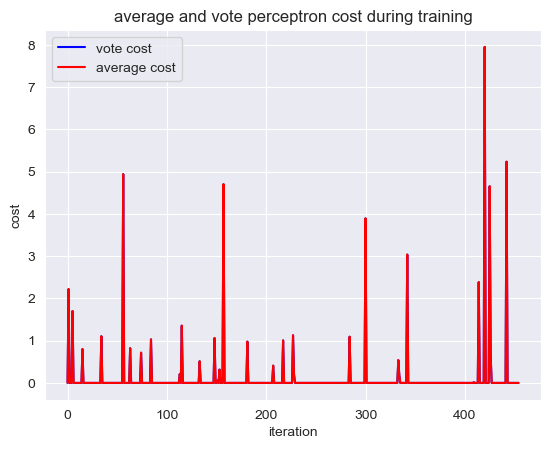

In [283]:
plt.figure()
plt.plot(np.arange(train_X.shape[0]), model_vote.cost, color = 'blue', label = "vote cost")
plt.plot(np.arange(train_X.shape[0]), model_avr.cost, color = 'red', label = "average cost")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.title("average and vote perceptron cost during training")
plt.legend()
plt.show()

Not much difference between vote and average perceptron can be found on the cost perspective. Probably due to cost is calculated during training process, but the unique part between two of them occur at output phase. So the cost

## Time Consuming

Text(0, 0.5, 'Time Cost (s)')

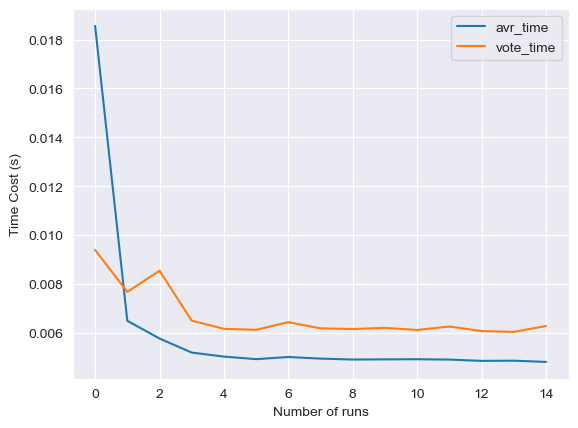

In [293]:
import time
import seaborn as sns

run = np.arange(15)
avr_time = []
vote_time = []
time_ = 0

for i in run:
    start_avr = time.time()
    model_avr = Vote_Ave_Perceptron(train_X_std, train_y, 0)
    model_avr.train()
    pred_avr = model_avr.output(test_X_std,"average")
    end_avr = time.time()
    time_ = end_avr  - start_avr
    avr_time.append(time_)

    start_vote = time.time()
    model_vote = Vote_Ave_Perceptron(train_X_std, train_y, 0)
    model_vote.train()
    pred_vote = model_vote.output(test_X_std,"vote")
    end_vote = time.time()
    time_ = end_vote - start_vote
    vote_time.append(time_)

plt.figure()
sns.lineplot(x = run, y = avr_time, label = "avr_time")
sns.lineplot(x = run, y = vote_time, label = "vote_time")
plt.xlabel("Number of runs")
plt.ylabel("Time Cost (s)")

Running 15 times, average perceptron is more time-saving than vote perceptron in most time.
The cause of this phenomenon is mainly related to the for loop which is in vote perceptron but not in vote perceptron, the time complexity is greatly reduced by such absence of this loop.
However, there is a great decrease on average perceptron between first and second experiments. I'm not sure about the reason, since each time is running under same settings, the gap should not so large between two different time. Plus, this great gap only occurs at second time running. It might because of some computer issues.

## Random Stiffness

Giving a random start point, to test two algorithms' performance robustness toward different origin

Text(0.5, 1.0, 'vote perceptron performance under random origin')

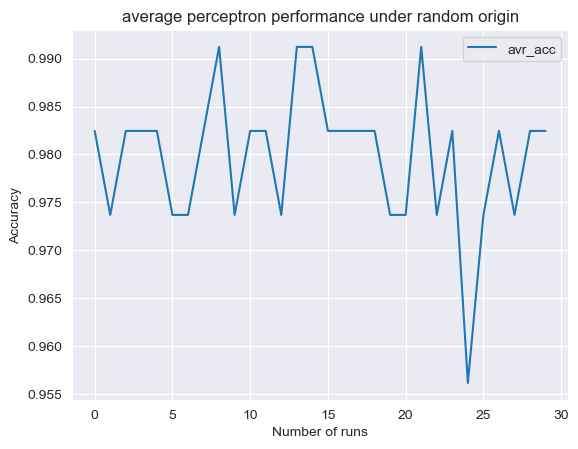

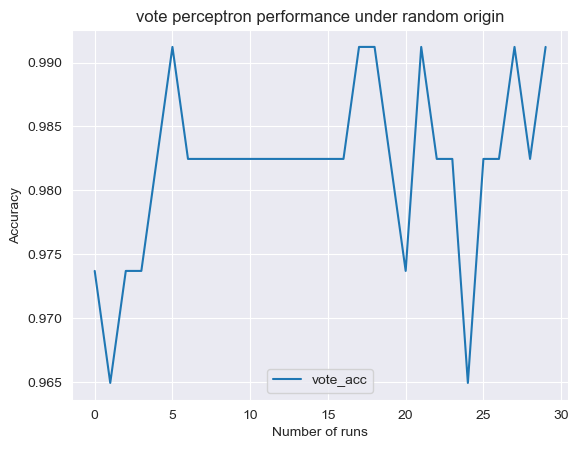

In [298]:
from sklearn.metrics import accuracy_score

run = np.arange(30)
avr_acc = []
vote_acc = []

for i in run:
    model_avr = Vote_Ave_Perceptron(train_X_std, train_y, 2)
    model_avr.train()
    pred_avr = model_avr.output(test_X_std,"average")
    avr_acc.append(accuracy_score(test_y, pred_avr))

    model_vote = Vote_Ave_Perceptron(train_X_std, train_y, 2)
    model_vote.train()
    pred_vote = model_vote.output(test_X_std,"vote")
    vote_acc.append(accuracy_score(test_y, pred_vote))

plt.figure()
sns.lineplot(x = run, y = avr_acc, label = "avr_acc")
plt.xlabel("Number of runs")
plt.ylabel("Accuracy")
plt.title("average perceptron performance under random origin")
plt.figure()
sns.lineplot(x = run, y = vote_acc, label = "vote_acc")
plt.xlabel("Number of runs")
plt.ylabel("Accuracy")
plt.title("vote perceptron performance under random origin")

Both of them have some damping under random condition, it is not clear to compare which is robuster. So I put them together

Text(0.5, 1.0, 'average and vote perceptron performance under random origin')

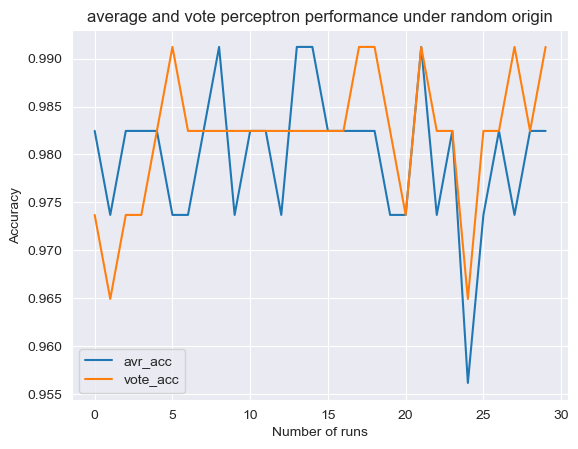

In [299]:
plt.figure()
sns.lineplot(x = run, y = avr_acc, label = "avr_acc")
sns.lineplot(x = run, y = vote_acc, label = "vote_acc")
plt.xlabel("Number of runs")
plt.ylabel("Accuracy")
plt.title("average and vote perceptron performance under random origin")

From the picture above, vote perceptron vibrating more moderate, it can be concluded that vote perceptron is more stable than average perceptron.

Consider vote perceptron give output by believing result provided by those have a better performance parameter and average perceptron give output by calculating a better parameter.
However, from time complexity perspective, vote is higher than average, since the difference is not so large, the latter opinion is more convenience

## Visualize Decision Boundary

In [410]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
vis_X_test = pca.fit_transform(test_X_std)
vis_X_train = pca.fit_transform(train_X_std)

In [411]:
model_avr = Vote_Ave_Perceptron(vis_X_train, train_y, 1)
model_avr.train()

model_vote = Vote_Ave_Perceptron(vis_X_train, train_y, 1)
model_vote.train()

In [412]:
def plot_DB(X, y, model, type):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))

    Z = model.output(np.c_[xx.ravel(), yy.ravel()], type)
    Z_plot = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z_plot, cmap = plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c= y, cmap = plt.cm.Spectral)
    plt.xlabel("feature x1")
    plt.ylabel("feature x2")
    plt.title(f"{type} perceptron decision boundary in 2D plane")

### Visualize average perceptron decision boundary

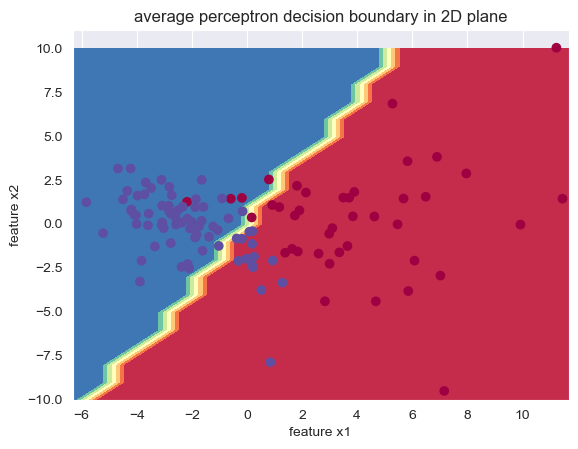

In [413]:
plot_DB(vis_X_test, test_y, model_avr, "average")
plt.show()

In [414]:
predict = model_avr.output(vis_X_test, "average")
print(classification_report(test_y, predict))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79        41
           1       0.92      0.81      0.86        73

    accuracy                           0.83       114
   macro avg       0.82      0.84      0.83       114
weighted avg       0.85      0.83      0.84       114



In 2D environment, due to some lack of information during pca decomposition, the performance is not as good as in 30D. However, the decision boundary also shows a clear linear boundary between two class of data, and express the characteristic of perceptron

Plus, because the given data is not totally linear separable, perceptron can not give a perfect result in 2D situation.

### Visualize vote perceptron decision boundary

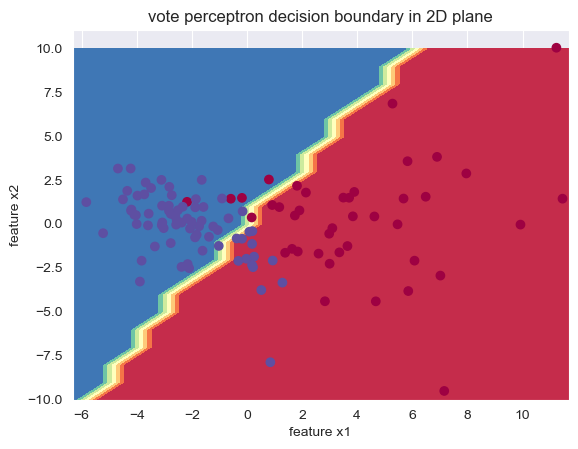

In [415]:
plot_DB(vis_X_test, test_y, model_vote, "vote")
plt.show()

In [416]:
predict = model_avr.output(vis_X_test, "vote")
print(classification_report(test_y, predict))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79        41
           1       0.92      0.81      0.86        73

    accuracy                           0.83       114
   macro avg       0.82      0.84      0.83       114
weighted avg       0.85      0.83      0.84       114



The decision boundary is quite familiar between two of them.

# What is the differences between Neural Network and Logistic Regression, Decision Tree and other model learned before

1. It is neurally implemented mathematical model
2. It contains great number of interconnected processing elements, which means numerous parameters in it.
3. Information stored in the neurons are basically weighted linkage of neurons
4. It has ability to learn, recall and generalize from given data
5. It demands a huge computation resources and cost much time to train a model